# Анализ данных по бананам



## 1. Загрузка и подготовка данных

Так как данные пердоставлены в формате csv, то для таких типов файлов при загрузке данных мы учитываем разделитель ; (т.е. в коде sep=";").
Изначально данные представлены в широком формате, где значения за разные годы находятся в отдельных столбцах.
Для анализа и построения графиков удобнее использовать длинный формат, в котором каждая строка — это одно наблюдение
Далее привели значения года к int, а кол-во импортированных бананов к numeric чтобы избежать различных ошибок.
В следующем шаге мы сбрасываем индекс для расчета показателей год-к-году.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.style.use("fivethirtyeight")

data = pd.read_csv("bananas.csv", sep=";")

df = (
    data
    .melt(id_vars="year", var_name="year_num", value_name="weight")
    .drop(columns=["year"])
)

df["year_num"] = df["year_num"].astype(int)
df["weight"] = pd.to_numeric(df["weight"])

df = df.sort_values("year_num").reset_index(drop=True)

df["abs_change"] = df["weight"].diff()
df["pct_change"] = df["weight"].pct_change() * 100

df


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,year_num,weight,abs_change,pct_change
0,2012,1260,NaN,NaN
1,2013,1336,76.0,6.031746
2,2014,1261,-75.0,-5.613772
3,2015,1222,-39.0,-3.092784
4,2016,1355,133.0,10.883797
5,2017,1544,189.0,13.948339
6,2018,1556,12.0,0.777202
7,2019,1512,-44.0,-2.827763
8,2020,1515,3.0,0.198413


## 2. Круговая диаграмма

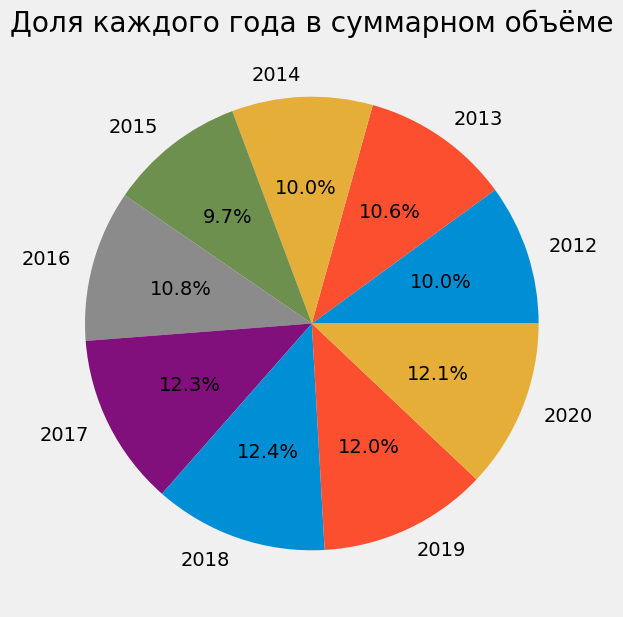

In [2]:

plt.figure(figsize=(7,7))
plt.pie(df["weight"], labels=df["year_num"], autopct="%1.1f%%")
plt.title("Доля каждого года в суммарном объёме")
plt.show()


## 3. Столбчатая диаграмма
Абсолютные значения по годам.

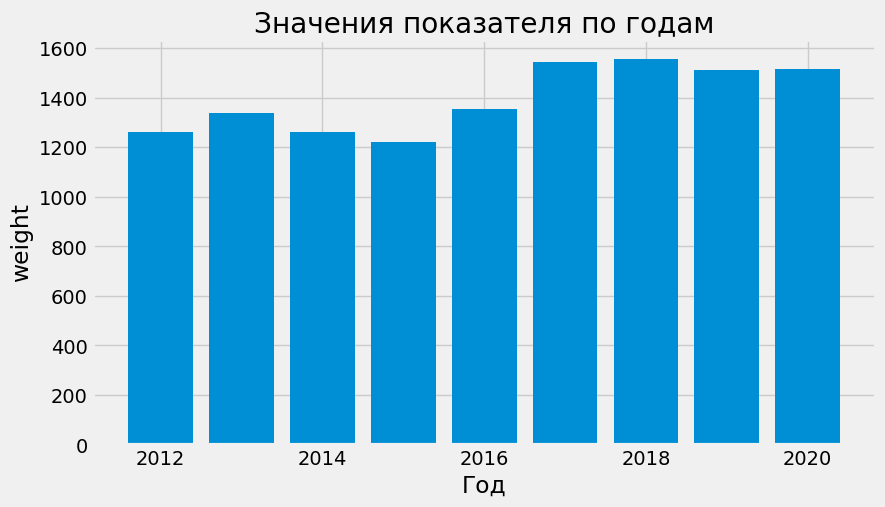

In [5]:

plt.figure(figsize=(9,5))
plt.bar(df["year_num"], df["weight"])
plt.title("Значения показателя по годам")
plt.xlabel("Год")
plt.ylabel("weight")
plt.show()


## 4. Столбчатая диграмма в разрезе абсолютного изменения показателя импорта

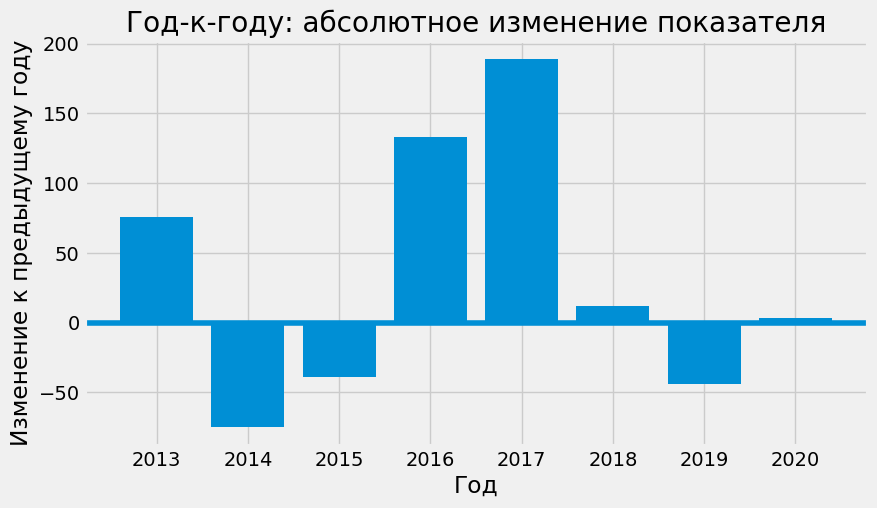

In [6]:
plt.figure(figsize=(9, 5))
plt.bar(df["year_num"], df["abs_change"])
plt.axhline(0) 

plt.title("Год-к-году: абсолютное изменение показателя")
plt.xlabel("Год")
plt.ylabel("Изменение к предыдущему году")

plt.show()

## 5. Диаграмма год-к-году


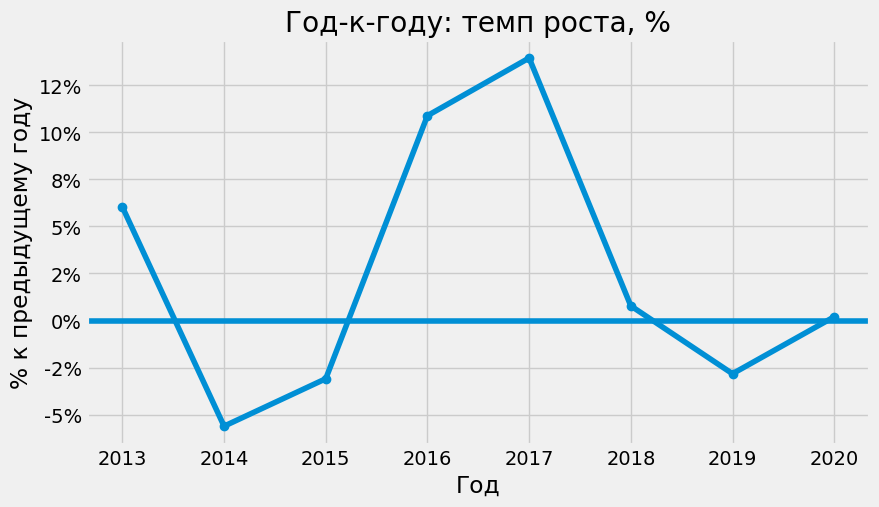

In [4]:

plt.figure(figsize=(9,5))
plt.plot(df["year_num"], df["pct_change"], marker="o")
plt.axhline(0)
plt.title("Год-к-году: темп роста, %")
plt.xlabel("Год")
plt.ylabel("% к предыдущему году")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x:.0f}%"))
plt.show()
